# TP3 - Exercice 1

<br>

## Détection de spam

<br>

Dans ce TP, nous allons entraîner des classifieurs pour décider si un mail est un spam ou non.

<br>

Tout d'abord, quelques indications sur l'utilisation des méthodes d'apprentissage de `scikit-learn`.

Les méthodes d'apprentissage supervisé de `scikit-learn` permettent de définir un objet, doté de différents attributs et méthodes, dont `cross_val_score` (pour calculer un score de validation croisée), `fit` (pour procéder à l'apprentissage), `predict` (pour prédire les classes des éléments d'une base de test), ou `score` pour calculer la proportion d'observations bien classées dans la base de test, sur laquelle on peut comparer la classe prédite à la "vraie" classe.

Ci-dessous, un exemple d'utilisation de la classification au plus proche voisin, dans un scénario où on suppose disposer d'une base d'apprentissage $(X_{train},y_{train})$, et d'une base de test $X_{test}$ pour laquelle on connaît $y_{test}$, de manière à valider l'apprentissage sur la base de test. Si on veut changer de classifieur, il suffit d'utiliser un autre constructeur que `neighbors.KNeighborsClassifier` et de passer les paramètres adéquats.


In [ ]:
# (le code suivant ne peut pas être exécuté "tel quel"...)

# classifieur au plus proche voisin (on peut changer le paramètre n_neighbors):
knn = neighbors.KNeighborsClassifier(n_neighbors=1)  

# calcul d'un score moyen de validation croisée "à 5 plis" sur (X_train,y_train)
scores = cross_val_score(knn,X_train,y_train,cv=5)
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(),2*scores.std()))

# la prédiction d'une nouvelle observation consistera à chercher le p.p.v. dans X_train, 
# et à associer la classe de ce p.p.v., donnée par y_train:
knn.fit(X_train,y_train)  
# Remarque: il n'y a pas d'apprentissage à proprement parler pour les p.p.v., 
# il s'agit juste de préciser la base dans laquelle seront cherchés les plus proches voisins

# on stocke dans y_pred les classes prédites sur un ensemble de test X_test:
y_pred = knn.predict(X_test)  

# calcul d'un score lorsqu'on connaît les vraies classes des observations de X_test: 
# (proportion d'observations pour lesquelles y_test==y_pred)
score = knn.score(X_test,y_test)

## 1. Préliminaires

<br>

Commençons par charger les bibliothèques utiles au TD.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors, linear_model, naive_bayes, metrics

%matplotlib inline 

Ensuite, on charge les données: récupérez au préalable le fichier `spambase.data` disponible sur le [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Spambase) (cliquez sur "Download"). La description complète de la base est dans le fichier `spambase.name`, à ouvrir avec un éditeur de texte.

<br>

La cellule suivante charge les données. On forme une base d'entraînement avec 80% des données (choix aléatoire), et on garde 20% des données pour faire une base de test. Dans la cellule suivante, on fixe la graîne du générateur aléatoire (`random_state=1`, la valeur est arbitraire) de manière à ce que l'on ait tous les mêmes résultats afin de faciliter la comparaison.


In [2]:
data = np.loadtxt('spambase.data', delimiter=',')
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.2, random_state=1)
# pour vérifier que les données sont bien chargées:
print("dataset:")
print(data)  
print("\nTOTAL - nombre d'observations, nombre de caractéristiques:")
print(data.shape)
print("\nAPPRENTISSAGE - nombre d'observations, nombre de caractéristiques:")
print(X_train.shape)
print("\nAPPRENTISSAGE - nombre de labels associés aux obervations:")
print(y_train.shape)
print("\nTEST - nombre d'observations, nombre de caractéristiques:")
print(X_test.shape)
print("\nTEST - nombre de labels associés aux obervations:")
print(y_test.shape)
print("\nobservations, base d'apprentissage:")
print(X_train)
print("\nlabels associés, base d'apprentissage:")
print(y_train)
print("\nproportion de spams dans la base d'apprentissage:")
print(np.mean(y_train))

dataset:
[[0.000e+00 6.400e-01 6.400e-01 ... 6.100e+01 2.780e+02 1.000e+00]
 [2.100e-01 2.800e-01 5.000e-01 ... 1.010e+02 1.028e+03 1.000e+00]
 [6.000e-02 0.000e+00 7.100e-01 ... 4.850e+02 2.259e+03 1.000e+00]
 ...
 [3.000e-01 0.000e+00 3.000e-01 ... 6.000e+00 1.180e+02 0.000e+00]
 [9.600e-01 0.000e+00 0.000e+00 ... 5.000e+00 7.800e+01 0.000e+00]
 [0.000e+00 0.000e+00 6.500e-01 ... 5.000e+00 4.000e+01 0.000e+00]]

TOTAL - nombre d'observations, nombre de caractéristiques:
(4601, 58)

APPRENTISSAGE - nombre d'observations, nombre de caractéristiques:
(3680, 57)

APPRENTISSAGE - nombre de labels associés aux obervations:
(3680,)

TEST - nombre d'observations, nombre de caractéristiques:
(921, 57)

TEST - nombre de labels associés aux obervations:
(921,)

observations, base d'apprentissage:
[[0.000e+00 0.000e+00 0.000e+00 ... 2.307e+00 9.000e+00 3.000e+01]
 [8.000e-02 1.700e-01 1.700e-01 ... 2.658e+00 5.700e+01 4.360e+02]
 [0.000e+00 0.000e+00 1.850e+00 ... 1.727e+00 5.000e+00 1.900e+01]


__Question 1__. A partir de la description de la base de données, justifiez la manière employée pour charger les données en `X` (observations) et `y` (labels). Quelles sont les caractéristiques des observations, les labels, et quel est le rapport avec le problème initial?

<font color=red>
  
As características    

</font>

__Remarque importante__: lorsqu'on teste des classifieurs, il est important de comparer les scores de classification obtenus à celui d'un "dummy classifier" (un classifieur fictif): un classifieur qui fait une prévision sans tenir compte des observations. Par exemple, ici un classifieur qui classerait toute observation comme "non spam" aurait raison dans presque 60% des cas. On espère donc que les classifieurs réels soient meilleurs. 

## 2. Classification aux plus proches voisins

<br>

Mettez en oeuvre les classifications au plus proche voisin et aux 5 plus proches voisins. Vous calculerez le score moyen de validation croisée à 5 plis sur la base d'apprentissage ainsi que le score obtenu sur la base de test. Vous vous inspirerez du code détaillé en introduction. 

__Question 2__. Quelle est la métrique utilisée pour déterminer les plus proches voisins? Quel est ce "score" calculé exactement? Quel lien entre score de validation croisée et score sur la base de test?

In [4]:
# votre code ici pour 1-ppv:
print()
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X_train, y_train)
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(), 2*scores.std()))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
print("score: %0.3f" % score)


score moyen de validation croisée: 0.809 (+/- 0.013)
score: 0.801


O KNN ele só calcula a distância. É pré-processamento.

In [5]:
# votre code ici pour 5-ppv:
print()
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train)
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(), 2*scores.std()))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
print("score: %0.3f" % score)


score moyen de validation croisée: 0.795 (+/- 0.029)
score: 0.798


<font color=red>

A métrica é o score.
    
</font>

__Question 3__. Pourquoi la métrique utilisée n'est-elle pas adaptée aux observations ?


<font color=red>

Porque 
    
</font>

__Question 4__. Pré-traitez les données par standardisation, comme expliqué ici sur [la documentation scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html) (utilisez `StandardScaler` de manière à utiliser la même normalisation sur la base d'apprentissage et sur la base de test, c'est important), puis recalculez les scores des deux classifieurs précédents.

In [6]:
# votre code:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standard = scaler.transform(X_train)
Y_test_standardized = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X_train_standard, y_train)
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(), 2*scores.std()))
knn.fit(X_train_standard, y_train)
y_pred = knn.predict(Y_test_standardized)
score = knn.score(Y_test_standardized, y_test)
print("score: %0.3f" % score)

KNN5 = neighbors.KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(KNN5, X_train_standard, y_train)
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(), 2*scores.std()))
KNN5.fit(X_train_standard, y_train)
y_pred = KNN5.predict(Y_test_standardized)
score = KNN5.score(Y_test_standardized, y_test)
print("score: %0.3f" % score)


score moyen de validation croisée: 0.902 (+/- 0.021)
score: 0.911
score moyen de validation croisée: 0.898 (+/- 0.011)
score: 0.911


## 3. Classifieur naïf de Bayes gaussien et classifieur de la régression logistique

<br>


__Question 5__. Pourquoi le classifieur naïf de Bayes gaussien ne nécessite-t-il pas de standardisation préalable des données ? (vous pouvez vérifier que la normalisation joue tout de même un faible rôle: elle a sans doute une influence sur le comportement de l'algorithme d'estimation des paramètres).


Mettez en oeuvre le classifieur naïf de Bayes gaussien (lisez le début de la [documentation](https://scikit-learn.org/stable/modules/naive_bayes.html) où vous retrouverez le contenu du cours, puis la syntaxe de `GaussianNB` [ici](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [7]:
# votre code pour le classifieur naïf de Bayes gaussien (sur les données originales):
print("classifieur naïf de Bayes gaussien (sur les données originales):")
gnb = naive_bayes.GaussianNB()
scores = cross_val_score(gnb, X_train, y_train)
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(), 2*scores.std()))
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score = gnb.score(X_test, y_test)
print("score: %0.3f" % score)

classifieur naïf de Bayes gaussien (sur les données originales):
score moyen de validation croisée: 0.825 (+/- 0.021)
score: 0.817


Mettez en oeuvre le classifieur de la régression logistique ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). 

Passez l'option `max_iter=2000` si vous avez un avertissement concernant la convergence de l'optimisation, de la manière suivante:
`LR = linear_model.LogisticRegression(max_iter=2000)`

régression logistique (sur les données standardisées):
meilleur estimateur:  LogisticRegression(C=10, max_iter=2000)
[0.90679348 0.91711957 0.925      0.92771739 0.92717391 0.9263587
 0.92608696 0.92663043]


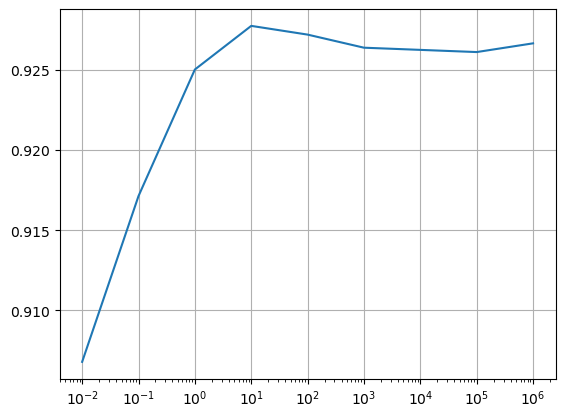


Classification par regression logistique
score moyen de validation croisée: 0.925 (+/- 0.023)


ValueError: Found input variables with inconsistent numbers of samples: [921, 3680]

In [ ]:
# votre code pour la régression logistique (sur les données standardisées):
import matplotlib.pyplot as plt

print("régression logistique (sur les données standardisées):")
logreg = linear_model.LogisticRegression(max_iter=2000)
GS = GridSearchCV(logreg, {'C': [0.01, 0.1, 1, 10, 100, 1000, 100000, 1000000]}, cv=5)
GS.fit(X_train_standard, y_train)
print("meilleur estimateur: ", GS.best_estimator_)
print(GS.cv_results_["mean_test_score"])
plt.figure()
plt.plot([0.01, 0.1, 1, 10, 100, 1000, 100000, 1000000], GS.cv_results_["mean_test_score"])
plt.xscale("log")
plt.grid()
plt.show()

print("\nClassification par regression logistique")
logreg = linear_model.LogisticRegression(max_iter=2000, C=1)
scores = cross_val_score(logreg, X_train_standard, y_train)
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(), 2*scores.std()))
logreg.fit(X_train_standard, y_train)
score_LR = logreg.score(X_test_standard, y_test)
print("score: %0.3f" % score_LR)
y_pred_lr = logreg.predict(X_test)

## 4. Analyse des résultats

<br>

On dispose des matrices de confusion, décrites [ici](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), et des rapports de classification, décrits [là](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

__Question 6__. Affichez ces matrices et rapports sur la base test pour les quatre classifieurs étudiés.

In [ ]:
# votre code ici:
p = 0.6


__Question 7__. Ici, par quoi pourraient s'expliquer les performances modestes du classifieur naïf de Bayes ?
A ce stade, quel classifieur préfére-t-on et pourquoi? Dans une application de détection de spams, cherche-t-on réellement à minimiser le taux d'erreur global?

<font color=red>
       
Réponse:
    
</font>

## 5. Toutes les erreurs ne se valent pas...

Le classifieur bayésien naïf gaussien et le classifieur de la régression logistique s'appuient tous deux sur la règle du maximum a posteriori. Ils permettent d'estimer la probabilité a posteriori $p(C_1|x)$ et détectent un spam lorsque $p(C_1|x)>1/2$, où $C_1$ désigne la classe "spam" et $x$ est une observation. Les deux classifieurs mettent en oeuvre le classifieur de Bayes, qui minimise le risque moyen de prédiction (le taux d'erreur).  Le taux d'erreur "compte" de la même manière les erreurs sur les deux classes.

Si on préfère réduire le taux de faux positif de la méthode (proportion de mails détectés à tort comme "spam"), on peut relever le seuil de cette probabilité. 

Les classifieurs `LogisticRegression` et `GaussianNB` possèdent tous deux une méthode `predict_proba` qui, pour un tableau d'observations, fournit la probabilité a posteriori de chaque classe, comme l'affiche la cellule suivante. On remarque que pour chaque observation $x$, $p(C_0|x)+p(C_1|x)=1$.  (attention, la documentation n'est pas très claire, `predict_proba` fournit bien la probabilité a posteriori, et pas la vraisemblance $p(x|C_k)$)

Remarquons qu'aucune probabilité n'est fournie par la classification aux plus proches voisins.

In [ ]:
print("probabilités a posteriori pour GNB:")
print(GNB.predict_proba(X_test))
print("\nprobabilités a posteriori pour LR:")
print(LR.predict_proba(X_test_standard))

In [ ]:
# faites varier le seuil de détection p:
p=0.5  # constatez que p=0.5 fournit les mêmes résultats pour y_pred_lr et y_pred_LRb
y_pred_LRb = (LR.predict_proba(X_test_standard)[:,1] >= p).astype(int)
#print(y_pred_LRb)   # pour visualiser les classes prédites
#print(y_pred_lr)
score_LRb = 1-np.mean(np.abs(y_test-y_pred_LRb))  # calcul du taux de reconnaissance

print("\nClassification de la régression logistique pour un seuil de probabilité p=%.3f" %p)
print('score sur la base de test: %.3f' %score_LRb)
print(metrics.classification_report(y_test,y_pred_LRb))
print("matrice de confusion:")
print(metrics.confusion_matrix(y_test,y_pred_LRb))



__Question 8__. Quelle valeur du seuil de probabilité $p$ faut-il choisir pour assurer un rappel de la classe "non spam" d'au moins 0.98?
Que penser de cet algorithme de détection de spam?

<font color=red>
    
Réponse:
    
</font>
